## Gather

In [1]:
import pandas as pd
import requests
import os
import json
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# load the image predictions file
url1 = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
r1 = requests.get(url1)

# write the download to a .tsv file
with open(os.path.join(url1.split('/')[-1]), mode='wb') as file:
    file.write(r1.content)
    
# load the twitter archive
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# load the image predictions file
url2 = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r2 = requests.get(url2)

# write the download to a .tsv file
with open(os.path.join(url2.split('/')[-1]), mode='wb') as file:
    file.write(r2.content)

# create a dataframe out of the .tsv file
df2 = pd.read_csv('image-predictions.tsv',sep='\t')

In [4]:
# load the additional twitter enhanced json file
url3 = 'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
r3 = requests.get(url3)

# write the download to a .txt file
with open(os.path.join(url3.split('/')[-1]), mode='wb') as file:
    file.write(r3.content)

# create a list then write the lines into the list
data = []
with open ('tweet-json.txt') as f:
    for line in f:
        data.append(json.loads(line))

df3 = pd.DataFrame(data)[['id_str','retweet_count','favorite_count']]

## Assess

### Visually

In [5]:
df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
425,821421320206483457,NaN,NaN,2017-01-17 18:17:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He just gradua...,7.823059e+17,4.196984e+09,2016-10-01 19:47:08 +0000,https://twitter.com/dog_rates/status/782305867...,12,10,Sampson,doggo,None,None,None
1291,708119489313951744,NaN,NaN,2016-03-11 02:36:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He basks in the glory of rebel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708119489...,9,10,Cooper,None,None,None,None
1977,672988786805112832,NaN,NaN,2015-12-05 04:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Schnozz. He's had a blurred tail since...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672988786...,10,10,Schnozz,None,None,pupper,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
301,836677758902222849,NaN,NaN,2017-02-28 20:41:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836677758...,11,10,Oliver,None,None,None,None
366,828801551087042563,NaN,NaN,2017-02-07 03:04:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gus. He likes to be clo...,8.102541e+17,4.196984e+09,2016-12-17 22:43:27 +0000,https://twitter.com/dog_rates/status/810254108...,12,10,Gus,None,None,None,None
848,766069199026450432,NaN,NaN,2016-08-18 00:28:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Juno. She can see your future. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766069199...,12,10,Juno,None,None,None,None
1450,695816827381944320,NaN,NaN,2016-02-06 03:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a dog enjoying a sunset. 11/10 would tr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695816827...,11,10,None,None,None,None,None
311,835297930240217089,NaN,NaN,2017-02-25 01:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ash. He's a Benebop Cumberplop. Quite rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835297930...,12,10,Ash,None,None,None,None
1409,699060279947165696,NaN,NaN,2016-02-15 02:38:53 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Yukon. He pukes rainbows. 12/10 magica...,NaN,NaN,NaN,https://vine.co/v/inlmMHxtqDD,12,10,Yukon,None,None,None,None


In [6]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
409,673715861853720576,https://pbs.twimg.com/media/CVmE_fAWIAAlDhU.jpg,1,suit,0.404115,False,bow_tie,0.294683,False,Windsor_tie,0.132701,False
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
1873,845306882940190720,https://pbs.twimg.com/media/C7siH5DXkAACnDT.jpg,1,Irish_water_spaniel,0.567475,True,Labrador_retriever,0.169496,True,curly-coated_retriever,0.101518,True
474,675147105808306176,https://pbs.twimg.com/media/CV6atgoWcAEsdv6.jpg,1,golden_retriever,0.949215,True,Labrador_retriever,0.016765,True,flat-coated_retriever,0.010637,True
285,671147085991960577,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,1,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,0.058690,True
1300,752660715232722944,https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg,2,goose,0.339324,False,English_setter,0.050512,True,basset,0.049093,True
1514,786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True
707,685169283572338688,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,1,Bernese_mountain_dog,0.975096,True,Appenzeller,0.014578,True,EntleBucher,0.005943,True
1959,865718153858494464,https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg,1,golden_retriever,0.673664,True,kuvasz,0.157523,True,Labrador_retriever,0.126073,True
1039,712085617388212225,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,0.625129,True,Tibetan_terrier,0.126897,True,Lhasa,0.119663,True


In [7]:
df3.sample(10)

,id_str,retweet_count,favorite_count
486,814153002265309185,10080,32000
2005,672264251789176834,383,1212
487,813944609378369540,3732,0
197,854365224396361728,5159,20046
1931,674019345211760640,340,1208
1065,740676976021798912,7724,19881
586,799757965289017345,2506,9390
1745,679111216690831360,2893,6514
1513,690989312272396288,3282,6513
2153,669603084620980224,401,1006


## Programmatically

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
sum(df1.duplicated())

0

In [14]:
sum(df1['tweet_id'].duplicated())

0

In [15]:
df1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [16]:
df1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
sum(df2.duplicated())

0

In [20]:
sum(df2['tweet_id'].duplicated())

0

In [21]:
sum(df2['jpg_url'].duplicated())

66

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id_str            2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [23]:
df3.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [24]:
sum(df3.duplicated())

0

In [25]:
sum(df3['id_str'].duplicated())

0

## Findings
### Tidiness
- In `df1` dog stages doggo, fluffer, puppo and pupper should be in a single dog stages column
- All three data frames should be in one data frame

### Quality
- In `df1` column tweet_id is an integer and should be a string
- In `df1` unnecessary columns: source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls. this will also eliminate the null values from this data frame
- In `df1` some rating numerators have decimals, some values are too high
- In `df1` the rating denominator is not always 10 whereas it should be according to the rating, the min and max value are different than 10
- In `df1` the data type of the dog stages is string whereas it should be categorical
- In `df1` datatype of the timestamp is string whereas it should be date_time
- In `df1` some entries are retweets not original tweets but we are only interested in original tweets
- In `df1` there are missing expanded urls which means that there was no picture
- In `df1` the source is not read friendly should be converted to more speaking categories
- In `df2` column tweet_id is an integer and should be string



## Cleaning

In [26]:
# Make copies of the original data frames
df1_c = df1.copy()
df2_c = df2.copy()
df3_c = df3.copy()

#### df1 column tweet_id is an integer

##### Define
Convert the datatype of the column tweet_id to a string

##### Code

In [27]:
df1_c.tweet_id = df1_c.tweet_id.astype(str)

##### Test

In [28]:
df1_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

#### df1 datatype of the timestamp is string whereas it should be date_time

##### Define
Convert the column timestamp to a date_time

#### Code

In [29]:
df1_c.timestamp = pd.to_datetime(df1_c.timestamp)

#### Test

In [30]:
df1_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

#### df1 some entries are retweets not original tweets but we are only interested in original tweets

##### Define
Filter all the rows in which the retweeted status id is null and define that as the new dataframe

##### Code

In [31]:
df1_c = df1_c[df1_c.retweeted_status_id.isnull()]

##### Test

In [32]:
df1_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

#### df1 there are missing expended urls which means that there was no picture

##### Define
Drop rows for where the expanded urls are null

##### Code

In [33]:
df1_c['expanded_urls'].dropna(inplace=True)

##### Test

In [34]:
sum(df1_c.expanded_urls.isnull())

0

#### df1 the source is not read friendly should be converted to more speaking categories

##### Define
Replace the name for each row with the last text in the column

##### Code

In [35]:
# Define the function for renaming the values
def rename(tweet):
    return tweet['source'].replace('<','>').split('>')[-3]

# Run the function with the apply method
df1_c.source = df1_c.apply(rename, axis=1)

##### Test

In [36]:
df1_c.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### df1 unnecessary columns

##### Define
Drop all columns that are not necessary

##### Code

In [37]:
df1_c.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

##### Test

In [38]:
df1_c.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### df1 dog stages doggo, fluffer, puppo and pupper should be one in one column

##### Define
Melt the columns of the dog stages to one single dog_stage column. For the tweet_ids where several dog stages apply merge them into one by stating all of the dog stages separated with a comma. Drop the different dog stages columns.

##### Code

In [39]:
# Define melt function
def melt_cols(tweet):
    dog_stage_per_row = []
    for col in df1_c.columns[7:11]:
        if tweet[col] != 'None':
            dog_stage_per_row.append(tweet[col])
    if dog_stage_per_row == []:
        dog_stage_per_row.append('None') 
    return dog_stage_per_row

# Execute melt function
df1_c['dog_stage'] = df1_c.apply(melt_cols, axis=1).astype(str).str[2:].str[:-2].str.replace("'", '')

# Drop unnecessary columns
df1_c.drop(df1_c.columns[7:11], axis=1, inplace=True)

##### Test

In [40]:
df1_c.dog_stage.value_counts()

None              1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [41]:
df1_c.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


In [42]:
len(df1_c)

2175

#### df1 the data type of the dog stages is string whereas it should be categorical

##### Define
Convert the datatype of the dog stages column to categorical

##### Code

In [43]:
df1_c.dog_stage = df1_c.dog_stage.astype('category')

##### Test

In [44]:
df1_c.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
rating_numerator               int64
rating_denominator             int64
name                          object
dog_stage                   category
dtype: object

#### df1 the rating denominator is not always 10 whereas it should be according to the rating, the min and max value are different than 10

##### Define
Select the rows in which the denominator is not equal to 10. Then identify if there is potentially another rating in the text by counting the number of occurences of "/". If there is more than one occurence identify the numerator that is closest to 10. Change the numerator and denominator according to the numerator identified closest to 10.
Then remove all the rows with a denominator that is not equal to 10.

##### Code

In [45]:
# First see the text of the rows which have denominator unequal to 10
pd.set_option('display.max_colwidth', -1)
df1_c[['rating_denominator','text']][df1_c.rating_denominator != 10]

,rating_denominator,text
313,0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
342,15,@docmisterio account started on 11/15/15
433,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,170,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228,90,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1


In [46]:
# Find the denominator closest to 10 and assign it
def new_denominator_numerator(row):
    if row.rating_denominator != 10:
        list_a = row['text'].replace('.','').split(' ')[:-1]
        ratings = [s for s in list_a if "/" in s]
        try:
            if len(ratings) > 1:
                denominator = []
                denominator_dist = []
                numerator = []
                numerator_dist = []               
                for element in ratings:
                    denominator.append(int(element[element.index('/')+1:]))
                    denominator_dist.append(abs(int(element[element.index('/')+1:])-10))
                    numerator.append(element[0:element.index('/')])
                    numerator_dist.append(abs(int(element[0:element.index('/')])-10))
                return [numerator[denominator_dist.index(min(denominator_dist))], denominator[denominator_dist.index(min(denominator_dist))]]
            else:
                return [0, 0]
        except:
            return [0, 0]
    else:
        return [0, 0]

df1_c[['new_numerator','new_denominator']] = df1_c.apply(new_denominator_numerator, axis=1, result_type='expand').astype(int)
df1_c.loc[df1_c['new_denominator'] != 0, 'rating_denominator'] = df1_c['new_denominator']
df1_c.loc[df1_c['new_numerator'] != 0, 'rating_numerator'] = df1_c['new_numerator']
df1_c.drop(['new_numerator','new_denominator'], axis=1, inplace = True)

df1_c = df1_c.loc[df1_c.rating_denominator == 10]

##### Test

In [47]:
df1_c[df1_c.rating_denominator != 10]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage


#### df1 some rating numerators have decimals others are higher than 15

##### Define
Identify rows that have a dot in the rating numerator. Convert the numerator to an integer. Assign the converted value as the new numerator. Then delete all the rows with numerators bigger than 15.

In [48]:
df1_c[['rating_numerator','text']].loc[(df1_c.rating_numerator < 0) | (df1_c.rating_numerator > 15)]

,rating_numerator,text
55,17,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
188,420,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189,666,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10"
290,182,@markhoppus 182/10
695,75,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
763,27,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
979,1776,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1712,26,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
2074,420,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY


##### Code

In [49]:
def new_numerator(row):
    if row.rating_numerator < 0 or row.rating_numerator > 15:
        list_a = row['text'].split(' ')[:-1]
        rating = [s for s in list_a if "/" in s]
        if '.' in str(rating)[:5]:   
            return int(float(str(rating)[2:str(rating).index('/')]))
        else:
            return 0
    else:
        return 0

df1_c['new_numerator'] = df1_c.apply(new_numerator, axis=1)
df1_c.loc[df1_c['new_numerator'] != 0, 'rating_numerator'] = df1_c['new_numerator']
df1_c.drop(['new_numerator'], axis=1, inplace = True)
df1_c = df1_c.loc[df1_c.rating_numerator < 16]

##### Test

In [50]:
df1_c.loc[763,['rating_numerator']], df1_c.loc[695,['rating_numerator']], df1_c.loc[1712,['rating_numerator']]

(rating_numerator    11
 Name: 763, dtype: object, rating_numerator    9
 Name: 695, dtype: object, rating_numerator    11
 Name: 1712, dtype: object)

In [51]:
df1_c.rating_numerator.value_counts()

12    500
10    443
11    428
13    309
9     157
8     98 
7     53 
14    44 
5     36 
6     32 
3     19 
4     15 
2     9  
1     7  
0     2  
15    1  
Name: rating_numerator, dtype: int64

#### df2 column tweet_id is an integer

##### Define
Convert the datatype of the column tweet_id to a string

##### Code

In [52]:
df2_c.tweet_id = df2_c.tweet_id.astype(str)

##### Test

In [53]:
df2_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### df2 66 jpg urls are duplicated

In [54]:
df2_c.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [55]:
df2_c.jpg_url.value_counts()
df2_c[df2_c.jpg_url == 'https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1377,763837565564780549,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
1541,791026214425268224,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True


#### All three data frames should be in one data frame

##### Define
First merge df1 with df2. Then merge this data frame with df3. This will automatically delete the tweets which do not have images

##### Code

In [56]:
df4_c = pd.merge(df1_c, df2_c, on='tweet_id')

In [57]:
df4_c = pd.merge(df4_c, df3_c, left_on='tweet_id', right_on='id_str').drop('id_str', axis=1)

##### Test

In [58]:
df4_c.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


## Storing, analyzing, and visualizing

### Storing

In [59]:
# Storing the data to a .csv file
df4_c.to_csv('twitter_archive_master.csv')

### Analyzing

#### Insight & visualization I
Analyze the occurence of tweets per weekday

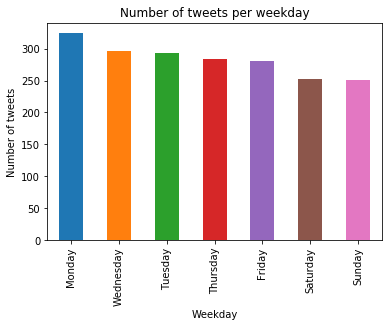

In [60]:
df4_c.timestamp.dt.weekday_name.value_counts().plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Number of tweets')
plt.title('Number of tweets per weekday');

The beginning of the has the highest number of tweets and it goes continuously down until the end of the week.

#### Insight & visualization II
Investigate the relationship between retweets and rating 

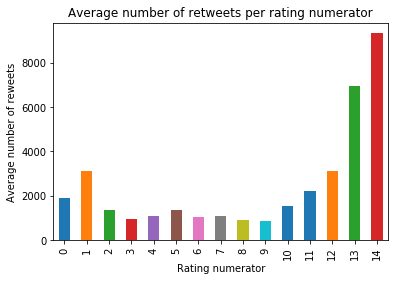

In [61]:
df4_c.groupby('rating_numerator')['retweet_count'].mean().plot(kind='bar')
plt.xlabel('Rating numerator')
plt.ylabel('Average number of reweets')
plt.title('Average number of retweets per rating numerator');

For the numerator rating equal or bigger than 10 there seems to be a positive correlation between the rating and the retweet count. For numerator ratings below 10 there I can derive no clear relationship. Especially tweets with a rating numerator of 1 seem to have a higher amount of retweets.

#### Insight III
Show the top ten dog types with the highest retweet counts. But only for the dogs that have been predicted correctly.

In [62]:
df4_c[df4_c.p1_dog == True].groupby('p1')['retweet_count'].mean().reset_index().sort_values(by=["retweet_count"], ascending=0).iloc[:9,:]

,p1,retweet_count
104,standard_poodle,6631.857143
0,Afghan_hound,5976.000000
19,English_springer,5973.555556
52,Saluki,5133.750000
27,Great_Pyrenees,5017.230769
21,Eskimo_dog,4768.888889
22,French_bulldog,4683.923077
53,Samoyed,4623.050000
13,Cardigan,4540.588235


The standard poodle has the highest retweet count.

#### Insight & visualization IIII
Investigate the relationship between dog stage and retweets

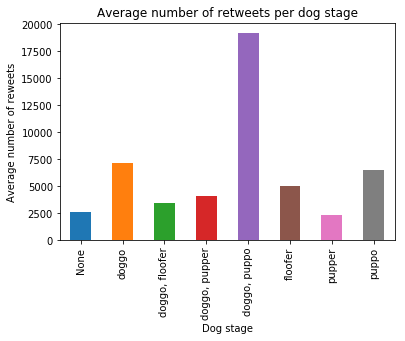

In [63]:
df4_c.groupby('dog_stage')['retweet_count'].mean().plot(kind='bar')
plt.xlabel('Dog stage')
plt.ylabel('Average number of reweets')
plt.title('Average number of retweets per dog stage');

The dog stage doggo, puppo is sticking out with many more retweets than the other dog types. 